# **Cardiovascular Disease Prediction**

#Importing the Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing the Dataset

In [54]:
df1 = pd.read_csv('cardio_train.csv',delimiter=';')
df1.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


# Exploratory Data Analysis

In [55]:
#Shape of the data
df1.shape

(70000, 13)

In [56]:
df1['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


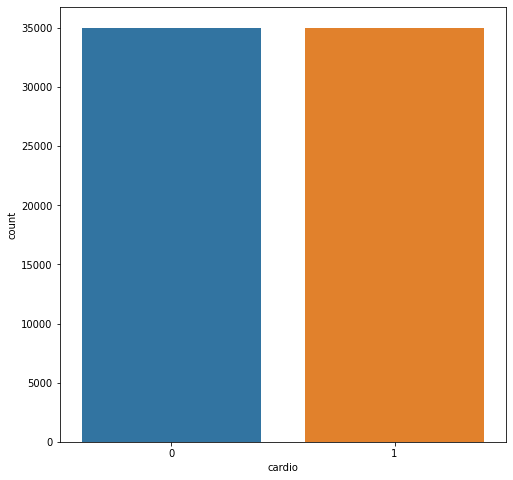

In [57]:
plt.figure(figsize = (8, 8))
sns.countplot(df1['cardio'])
plt.show()

In [58]:
#count null values in each column
df1.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [59]:
df1['age'] = (df1['age']/365).round(0)

In [60]:
df1.insert(3, "female", (df1['gender']==1).astype(int))
df1.insert(4, 'male', (df1['gender']==2).astype(int))
df1.drop(['gender', 'id'], axis=1, inplace=True)

In [61]:
df1.head(7)

,age,female,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,0,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,0,1,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,0,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,0,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,0,157,93.0,130,80,3,1,0,0,1,0


In [62]:
df1.duplicated().sum()

3816

In [63]:
df1.drop_duplicates(inplace=True)

In [64]:
df1.insert(5, 'bmi', round((df1['weight']/(df1['height']/100)**2), 2))

In [65]:
df1.head(7)

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,0,1,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55.0,1,0,156,85.0,34.93,140,90,3,1,0,0,1,1
2,52.0,1,0,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48.0,0,1,169,82.0,28.71,150,100,1,1,0,0,1,1
4,48.0,1,0,156,56.0,23.01,100,60,1,1,0,0,0,0
5,60.0,1,0,151,67.0,29.38,120,80,2,2,0,0,0,0
6,61.0,1,0,157,93.0,37.73,130,80,3,1,0,0,1,0


In [66]:
df1.shape

(66184, 14)

In [67]:
df1.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,0.642769,0.357231,164.345114,74.579057,27.703596,129.304938,97.607186,1.385985,1.238169,0.092772,0.056751,0.797625,0.513614
std,6.807710,0.479187,0.479187,8.353877,14.613279,6.201670,158.368179,193.782532,0.692229,0.584137,0.290114,0.231368,0.401773,0.499818
min,30.000000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,165.000000,72.000000,26.570000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,1.000000,1.000000,170.000000,83.000000,30.470000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df1.drop(df1.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [69]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
df1.insert(8, "bp_cat", df1.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df1['bp_cat'].value_counts()

normal      35449
high 1      15273
high 2      14873
elevated      419
high 3         77
Name: bp_cat, dtype: int64

In [70]:
df1.drop(df1.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [71]:
df1.head(7)

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.0,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,52.0,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.0,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,48.0,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0
5,60.0,1,0,151,67.0,29.38,120,80,normal,2,2,0,0,0,0
6,61.0,1,0,157,93.0,37.73,130,80,high 1,3,1,0,0,1,0


In [72]:
#Get correlation of the columns
df1.corr()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,0.024005,-0.024005,-0.087129,0.053498,0.101968,0.210722,0.152928,0.157225,0.099511,-0.050334,-0.030902,-0.010094,0.235940
female,0.024005,1.000000,-1.000000,-0.520653,-0.151597,0.120867,-0.056140,-0.064528,0.045444,0.027369,-0.341341,-0.170984,-0.009489,-0.000651
male,-0.024005,-1.000000,1.000000,0.520653,0.151597,-0.120867,0.056140,0.064528,-0.045444,-0.027369,0.341341,0.170984,0.009489,0.000651
height,-0.087129,-0.520653,0.520653,1.000000,0.312275,-0.211306,0.020181,0.037166,-0.054003,-0.020205,0.197216,0.099677,-0.008308,-0.010432
weight,0.053498,-0.151597,0.151597,0.312275,1.000000,0.856493,0.263487,0.248326,0.132974,0.101117,0.060501,0.063460,-0.012325,0.174093
bmi,0.101968,0.120867,-0.120867,-0.211306,0.856493,1.000000,0.258755,0.234377,0.163165,0.113085,-0.042686,0.011336,-0.009137,0.183263
ap_hi,0.210722,-0.056140,0.056140,0.020181,0.263487,0.258755,1.000000,0.696779,0.186051,0.086249,0.021208,0.027387,0.004650,0.424058
ap_lo,0.152928,-0.064528,0.064528,0.037166,0.248326,0.234377,0.696779,1.000000,0.155448,0.073439,0.022126,0.040627,0.002971,0.336313
cholesterol,0.157225,0.045444,-0.045444,-0.054003,0.132974,0.163165,0.186051,0.155448,1.000000,0.443040,0.002055,0.029690,0.018699,0.213418
gluc,0.099511,0.027369,-0.027369,-0.020205,0.101117,0.113085,0.086249,0.073439,0.443040,1.000000,-0.011631,0.006589,-0.000042,0.081151


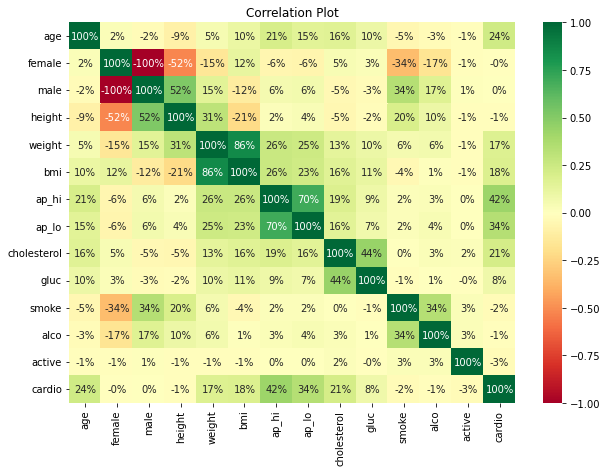

In [73]:
plt.figure(figsize = (10,7))
sns.heatmap(df1.corr(), center = 0, annot = True,cmap="RdYlGn", fmt='.0%')
plt.title("Correlation Plot")
plt.show()

<function matplotlib.pyplot.show>

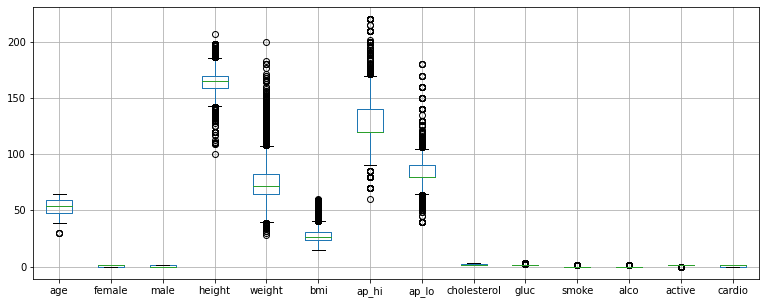

In [74]:
df1.boxplot(figsize=(13,5))
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d7edbed10>,
      dtype=object)

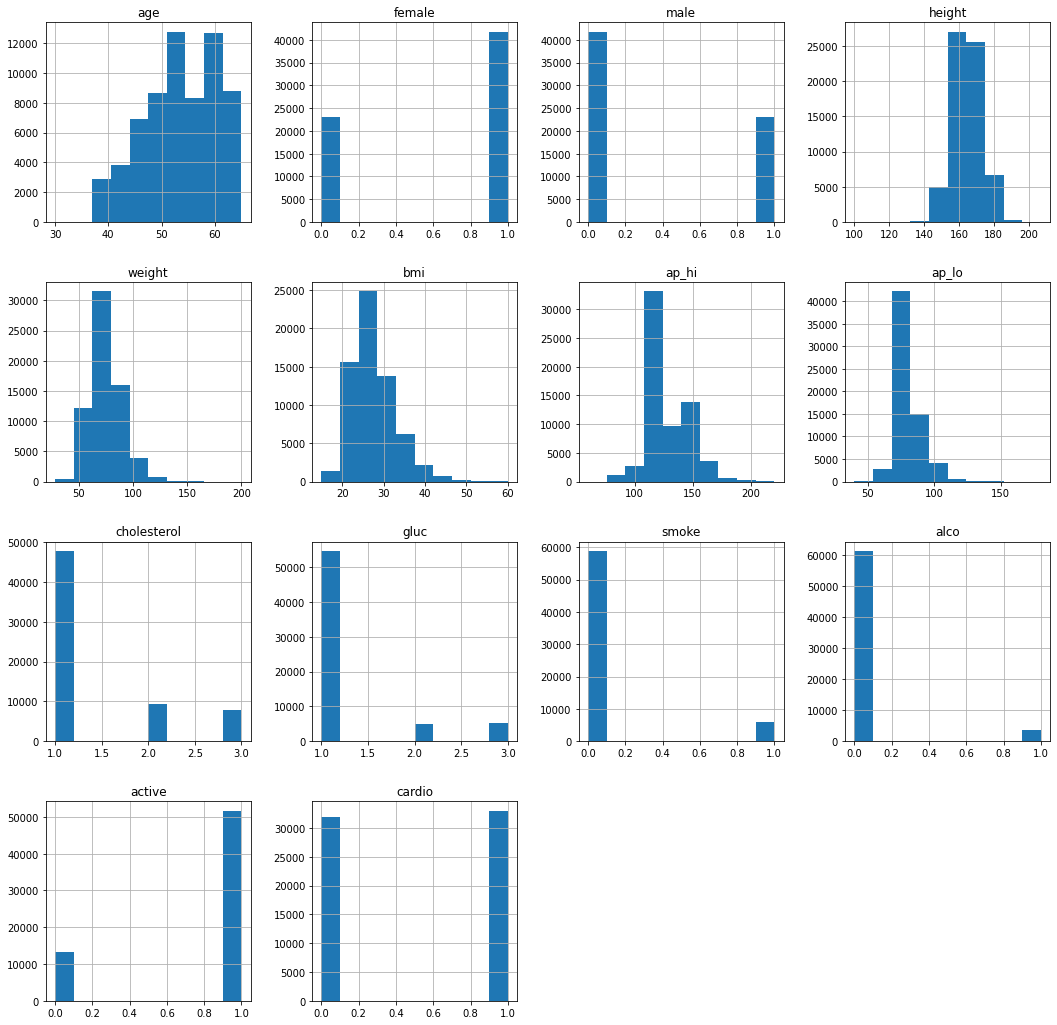

In [75]:
df1.hist(figsize = (18,18))

### Splitting the dataset into the Training set and Test

In [76]:
 df1.drop(['bp_cat'], axis=1, inplace=True)

In [77]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [82]:
#split the data 80% training 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
df1.head(7)

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,0,1,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55.0,1,0,156,85.0,34.93,140,90,3,1,0,0,1,1
2,52.0,1,0,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48.0,0,1,169,82.0,28.71,150,100,1,1,0,0,1,1
4,48.0,1,0,156,56.0,23.01,100,60,1,1,0,0,0,0
5,60.0,1,0,151,67.0,29.38,120,80,2,2,0,0,0,0
6,61.0,1,0,157,93.0,37.73,130,80,3,1,0,0,1,0


# Feature Scaling

In [30]:
#from sklearn.preprocessing import  StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#Training The ML Models

## Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(start=1, stop=20, step=1),'n_estimators': np.arange(start=100, stop=1000, step=100), 'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = RandomizedSearchCV(rf, parameters)

In [85]:
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [86]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 200}

In [87]:
clf.best_score_

0.7272426114067858

In [88]:
tuned_rf_model = RandomForestClassifier(criterion = 'entropy', max_depth= 9, max_features='log2', n_estimators = 200)

In [89]:
tuned_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=200)

In [90]:
y_pred = tuned_rf_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


### Making the Confusion Matrix

Accuracy on Test Data: 73.36450999537489%
Precision Score: 0.768043005833238
Recall Score: 0.6803444782168186
F1 Score: 0.7215387095041099


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


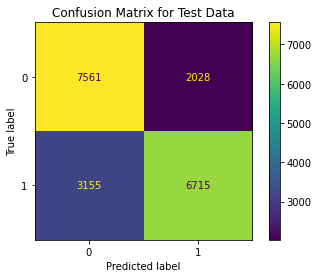

In [91]:
#test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,plot_roc_curve
y_pred = tuned_rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { rf_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix(  tuned_rf_model, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 73.99511045525627%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


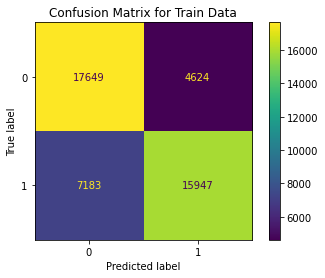

In [92]:
#train set
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {rf_train_acc*100}%")
plot_confusion_matrix(tuned_rf_model , X_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


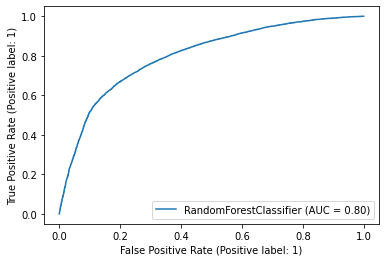

In [93]:
plot_roc_curve(tuned_rf_model, X_test, y_test)

#Saving the Model

In [94]:
import pickle
filename = 'cardio_model.sav'
pickle.dump(tuned_rf_model,open(filename,'wb'))

In [95]:
load_diabetes_model = pickle.load(open(filename,'rb'))

In [96]:
load_diabetes_model = pickle.load(open(filename,'rb'))
load_diabetes_model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [97]:
test_values = ([[55.0, 1, 0, 156, 85.0, 34.93, 140, 90, 3, 1, 0, 0,1]])


In [98]:
pred_result_diabetes = load_diabetes_model.predict(test_values)
print(pred_result_diabetes)

[1]
